GoalZone is a fitness club chain providing five types of fitness classes in Canada. Finally, the fitness classes schedule is back to normal after the COVID-19 restrictions are lifted. However, they have received many complaints from the customers about having a hard time booking a fitness class.

From initial analysis, the program operation team found out that the fitness classes are always fully booked but are having a low attendance rate per class. To improve this situation, they would like to increase the class capacity for customers to sign up if a low attendance rate is predicted.

In [54]:
# Data Validation
# necesarry libraries have been imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read the dataset 
fitness_df = pd.read_csv("data/fitness_class.csv")
fitness_df.head()


,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month
0,Wed,AM,Yoga,15,1,8,31.1,6,4
1,Sun,PM,Aqua,15,3,8,27.0,7,8
2,Mon,AM,Aqua,15,5,10,22.4,8,7
3,Sun,PM,Strength,25,3,18,23.5,7,9
4,Mon,AM,Yoga,15,5,10,29.8,5,7


In [55]:
# the dataset information and missing values have been checked, but nothing irregular has been identified
print(fitness_df.info())
print(fitness_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day_of_week     765 non-null    object 
 1   time            765 non-null    object 
 2   class_category  765 non-null    object 
 3   class_capacity  765 non-null    int64  
 4   days_before     765 non-null    int64  
 5   attendance      765 non-null    int64  
 6   age             765 non-null    float64
 7   new_students    765 non-null    int64  
 8   over_6_month    765 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 53.9+ KB
None
day_of_week       0
time              0
class_category    0
class_capacity    0
days_before       0
attendance        0
age               0
new_students      0
over_6_month      0
dtype: int64


In [56]:
# The numeric data for outliers has been checked using describe method and updated accordingly: Class capacity should be either 15 or 25. Any other value has been corrected. Also the average age should not be less than 14. All the rows for which average age is smaller than 14 have been removed

print('Dataset overview before corrections: \n', fitness_df.describe())

fitness = fitness_df[fitness_df['age'] >= 14]
fitness.loc[fitness['class_capacity'] == 26, 'class_capacity'] = 25

print('Dataset overview after corrections: \n', fitness.describe())


Dataset overview before corrections: 
        class_capacity  days_before  attendance         age  new_students  \
count      765.000000   765.000000  765.000000  765.000000    765.000000   
mean        17.542484     2.547712    9.563399   29.092680      5.917647   
std          4.365481     1.355379    3.896598    5.912063      1.789224   
min         15.000000     1.000000    4.000000    8.300000      1.000000   
25%         15.000000     1.000000    7.000000   25.300000      5.000000   
50%         15.000000     2.000000    9.000000   29.000000      6.000000   
75%         25.000000     4.000000   11.000000   33.200000      7.000000   
max         26.000000     5.000000   21.000000   48.800000     11.000000   

       over_6_month  
count    765.000000  
mean       7.577778  
std        1.974518  
min        2.000000  
25%        6.000000  
50%        8.000000  
75%        9.000000  
max       13.000000  
Dataset overview after corrections: 
        class_capacity  days_before  atte

In [57]:
# categorical data has been checked for discrepancies but none has been identified

for col in fitness[['day_of_week', 'time', 'class_category']]:
    print(fitness[col].unique())

['Wed' 'Sun' 'Mon' 'Tue' 'Thu' 'Sat' 'Fri']
['AM' 'PM']
['Yoga' 'Aqua' 'Strength' 'HIIT' 'Cycling']


In [58]:
# A new column for the attendance rate has been introduced (dividing attendance by class_capacity)
fitness['attendance_rate'] = fitness['attendance'] / fitness['class_capacity']
fitness.head()


,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month,attendance_rate
0,Wed,AM,Yoga,15,1,8,31.1,6,4,0.533333
1,Sun,PM,Aqua,15,3,8,27.0,7,8,0.533333
2,Mon,AM,Aqua,15,5,10,22.4,8,7,0.666667
3,Sun,PM,Strength,25,3,18,23.5,7,9,0.720000
4,Mon,AM,Yoga,15,5,10,29.8,5,7,0.666667


In [59]:
# a pivot table has been performed to have a better overview of the total attendance per class and for each day of week.

fitness_pv = fitness.pivot_table(values = 'attendance', index = 'day_of_week', columns = 'class_category', aggfunc = np.sum)
order = ['Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun']
fitness_pv = fitness_pv.loc[order]
print(fitness_pv)


class_category  Aqua  Cycling  HIIT  Strength  Yoga
day_of_week                                        
Mon              220      134   155       102   257
Tue              199      216   208       298   268
Wed              174      150   181       322   275
Thu              286      137   227       178   314
Fri              238      195   126       175   171
Sat              192      166   172       224   155
Sun              217      189   206       271   256


## Data Validation

- the dataset information and missing values have been checked, but nothing irregular has been identified
- The numeric data for outliers has been checked using describe method and updated accordingly: Class capacity should be either 15 or 25. Any other value has been corrected. Also the average age should not be less than 14. All the rows for which average age is smaller than 14 have been removed
- categorical data has been checked for discrepancies but none has been identified
- A new column for the attendance rate has been introduced (dividing attendance by class_capacity)

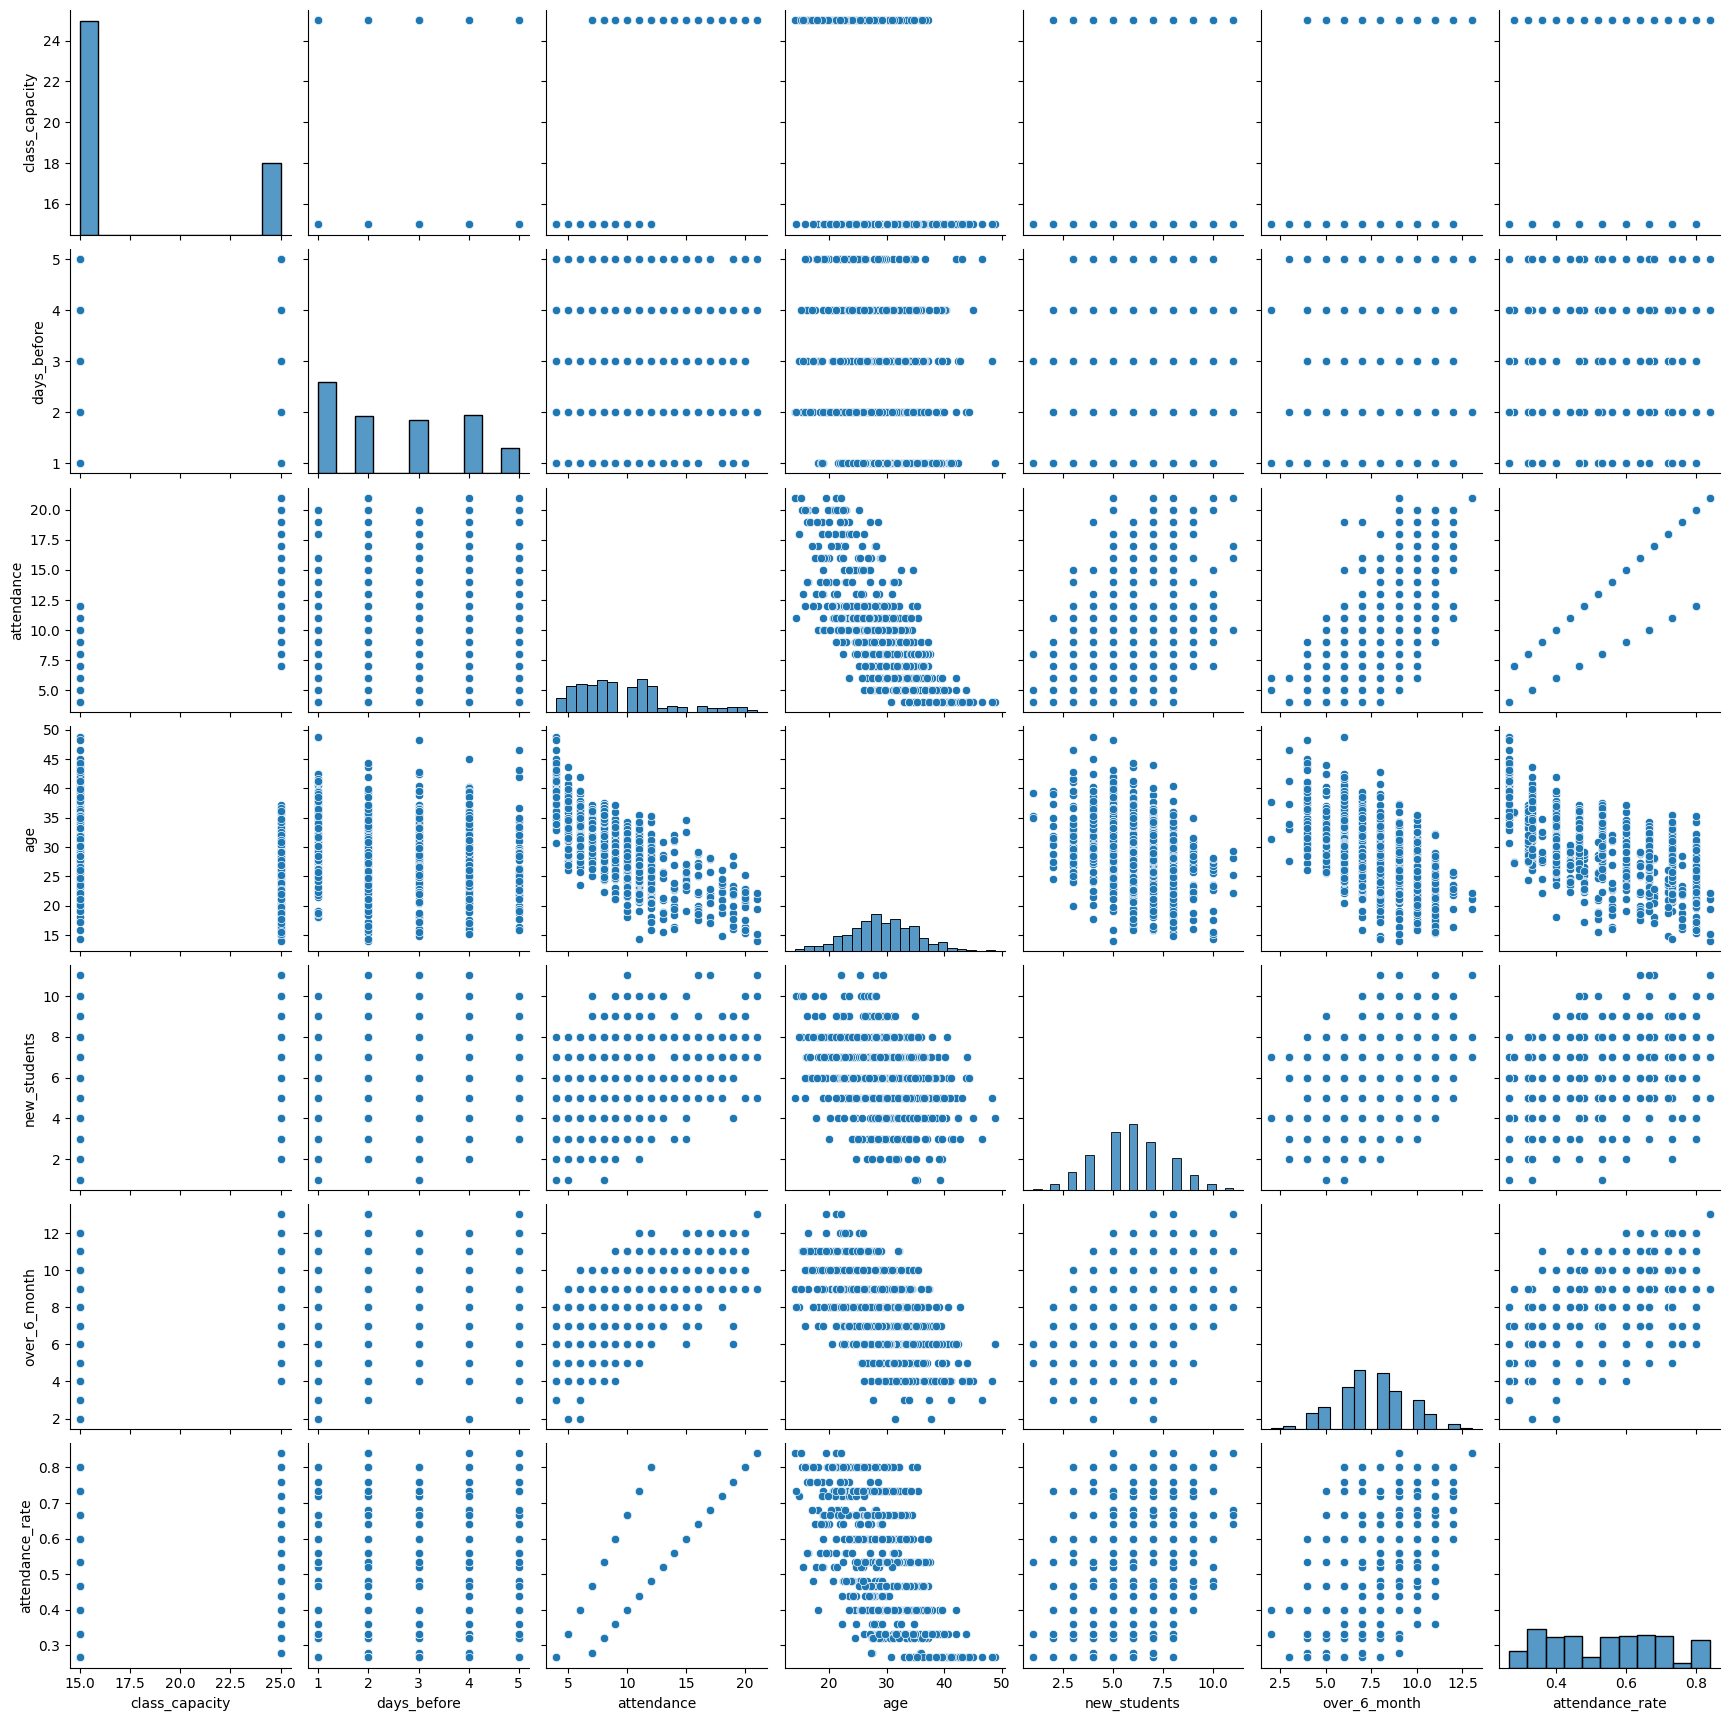

In [60]:
# Exploratory Analysis

# the relationships across entire data set have been explored with pairplot
sns.pairplot(fitness)

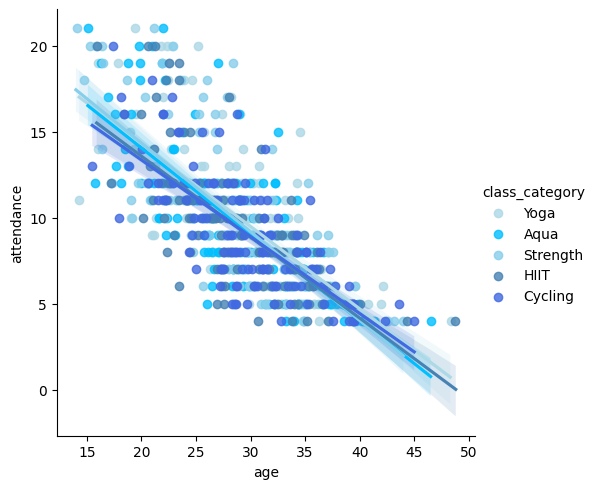

In [61]:
# the attendance based on average age has been explored, taking into account the class categories. It has been concluded that the attendance is higher for younger students for all class categories.

sns.lmplot(x = 'age', y = 'attendance', data = fitness, x_jitter = .1, hue = 'class_category', 
           palette = ('lightblue', 'deepskyblue', 'skyblue', 'steelblue', 'royalblue'))


<AxesSubplot:xlabel='age', ylabel='over_6_month'>

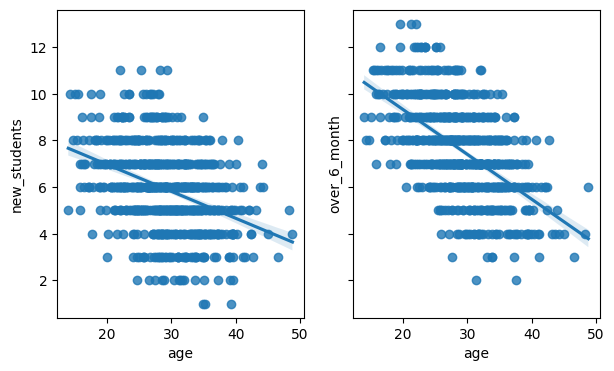

In [62]:
# The average age of new and over 6 months students has been compared. It has been observed that younger students tend to be older members of the fitness group

fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (7,4) )
sns.regplot(x = 'age', y = 'new_students', data = fitness, ax = ax0)
sns.regplot(x = 'age', y = 'over_6_month', data = fitness, ax = ax1)

<AxesSubplot:title={'center':'Total attendance per day for each class category'}, xlabel='day_of_week'>

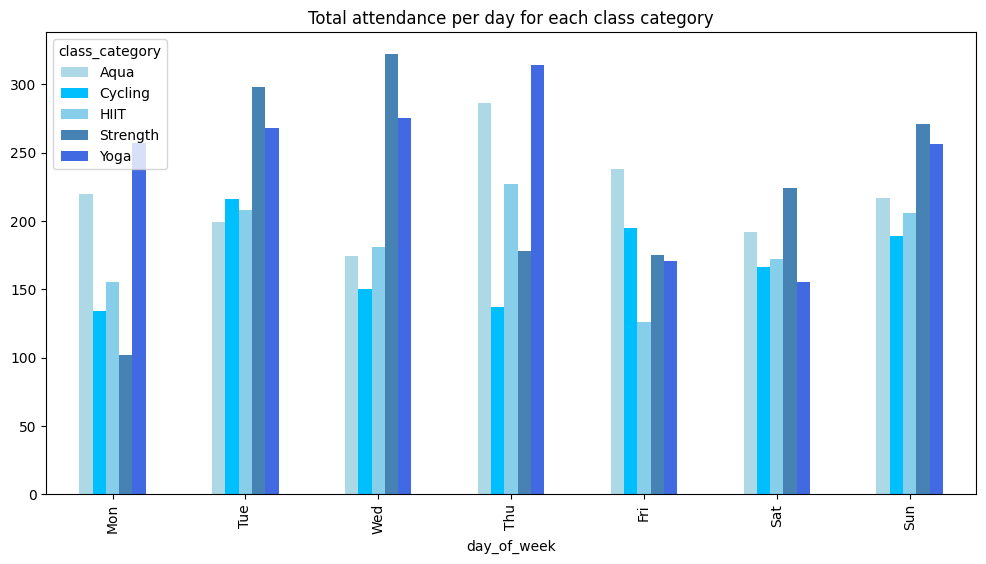

In [63]:
# the attendance per day for each class category has been explored. It has been identified that the attendance is almost equally distributed for each day of the week and that yoga has in general the highest attendance. 

fitness_pv.plot.bar(title = 'Total attendance per day for each class category', figsize = (12,6), color = ('lightblue', 'deepskyblue', 'skyblue', 'steelblue', 'royalblue'))

Text(0.5, 1.03, 'Attendance per day and class category for each time of the day')

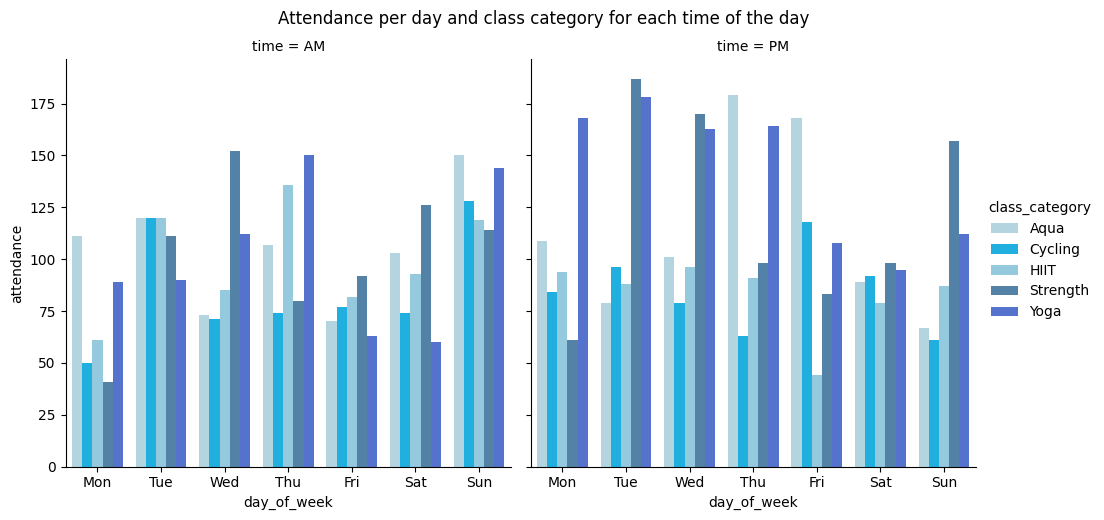

In [64]:
# the attendance per day and class category for each time of the day has been explored. It has been identified that the attendance is higher in the afternoon, especially for Yoga and Strength.

fitness_pvt = fitness.pivot_table(values = 'attendance', index = ['day_of_week', 'class_category', 'time'], aggfunc = np.sum)
order = ['Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun']
fitness_pvt = fitness_pvt.loc[order].reset_index()

g = sns.factorplot(x = 'day_of_week', y = 'attendance', data = fitness_pvt, hue = 'class_category', kind = 'bar', col = 'time',
              palette = ('lightblue', 'deepskyblue', 'skyblue', 'steelblue', 'royalblue'))
g.fig.suptitle('Attendance per day and class category for each time of the day', y = 1.03)

## Exploratory Analysis

- the relationships across entire data set have been explored with pairplot
- the attendance based on average age has been explored, taking into account the class categories. It has been concluded that the attendance is higher for younger students for all class categories.
- The average age of new and over 6 months students has been compared. It has been observed that younger students tend to be older members of the fitness group
- the attendance per day for each class category has been explored. It has been identified that the attendance is almost equally distributed for each day of the week and that yoga has in general the highest attendance.
- the attendance per day and class category for each time of the day has been explored. It has been identified that the attendance is higher in the afternoon, especially for Yoga and Strength.

In [65]:
# Convert categorical variables into indicator variables (except the class_capacity column)

new_fitness = pd.get_dummies(fitness, columns = ['day_of_week', 'time'], drop_first = True)

In [66]:
#Split the data into training and test sets. Set the variable X to the numerical features of the set and the y to the 'attendance_rate' column. Since the columns 'attendance' and class capacity have been used to calculate attendance rate, they will not be taken into consideration as well

X = new_fitness.drop(['class_category', 'attendance', 'class_capacity', 'attendance_rate'], axis = 1)
y = new_fitness['attendance_rate']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=15)

In [67]:
#Create the linear regressor model and fit it the the train sets. The linear regression model has been chosen firstly because it is easy to interpret and it is faster than other machine learning models. 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [68]:
# Predict on the test data: y_pred
y_pred = lr.predict(X_test)


In [69]:
# Create the Decision Tree Regressor model. The decision tree regressor model has been chosen, because as linear regression, it is easy to understand and interpret. Also GridSearchCV has been used for hyperparameter tuning in order to make sure that the optimal hyperparameters have been chosen so that the model will achieve the best score

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 15)

# Use GridSearchCV with multiple parameters and fit the model
from sklearn.model_selection import GridSearchCV

params_dt = {'max_depth':[3, 4, 5, 6], 'min_samples_leaf': [0.04, 0.06, 0.08], 'max_features' :[0.2, 0.4, 0.6, 0.8]}
grid_dt = GridSearchCV(estimator = dt, param_grid = params_dt, scoring = 'neg_mean_squared_error', cv =10, n_jobs= -1)
grid_dt.fit(X_train, y_train)



GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=15), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             scoring='neg_mean_squared_error')

## Model Fitting

- Convert categorical variables into indicator variables (except the class_capacity column)
- Split the data into training and test sets. Set the variable X to the numerical features of the set and the y to the 'attendance_rate' column. Since the columns 'attendance' and class capacity have been used to calculate attendance rate, they will not be taken into consideration as well
- Create the linear regressor model and fit it the the train sets. The linear regression model has been chosen firstly because it is easy to interpret and it is faster than other machine learning models. 
- Create the Decision Tree Regressor model. The decision tree regressor model has been chosen, because as linear regression, it is easy to understand and interpret. Also GridSearchCV has been used for hyperparameter tuning in order to make sure that the optimal hyperparameters have been chosen so that the model will achieve the best score


In [70]:
# Compute and print Root Mean Square Error score for linear regression. This score has been chosen because RMSE can be interpreted as the average error that the model's predictions have in comparison with the actual. A 0.12 score shows that the model has performed quite well, but more details regarding this score can be found in the graphic representations below

from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 0.12032755907286322


In [71]:
# Compute and print the RMSE score for Decission Tree. For Decision Tree, the RMSE score has been chosen because it is easier to interpret and it's comparable with the same score for linear regression model. A score of 0.128 is almost as good as the score of the linear regression model.

best_hyperparams = grid_dt.best_params_
best_model = grid_dt.best_estimator_
dt_pred = best_model.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, dt_pred))
print(best_model)
print("Root Mean Squared Error: {}".format(rmse_dt))


DecisionTreeRegressor(max_depth=4, max_features=0.8, min_samples_leaf=0.08,
                      random_state=15)
Root Mean Squared Error: 0.12823066933945895


Text(0, 0.5, 'Predicted y for Decision Tree')

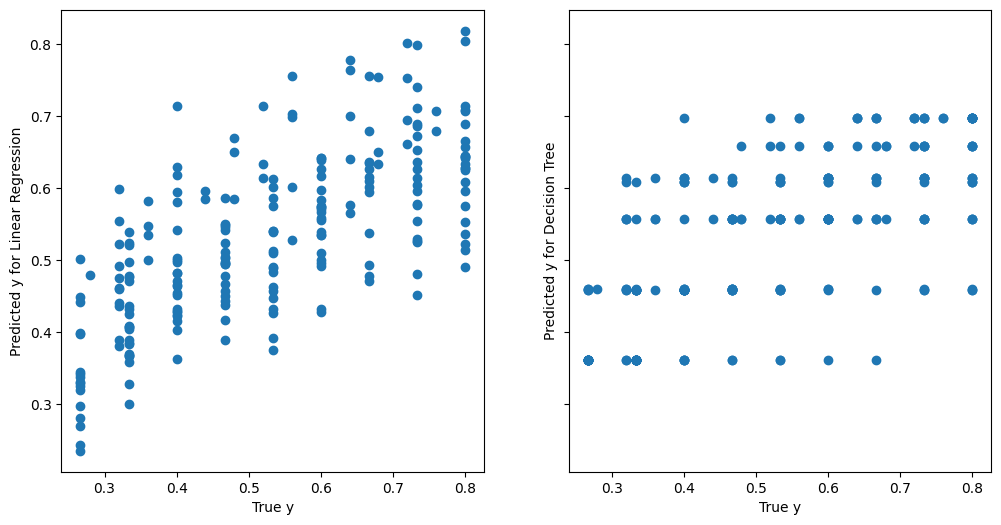

In [72]:
#Create a scatterplot of the real test values versus the predicted values for both models. This will help to understand easier how the predicted values might differ from the true values

fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (12,6))

ax0.scatter(y_test, y_pred)
ax0.set_xlabel('True y')
ax0.set_ylabel('Predicted y for Linear Regression')
ax1.scatter(y_test, dt_pred)
ax1.set_xlabel('True y')
ax1.set_ylabel('Predicted y for Decision Tree')

Text(0.5, 1.0, 'Decision Tree Model Residuals')

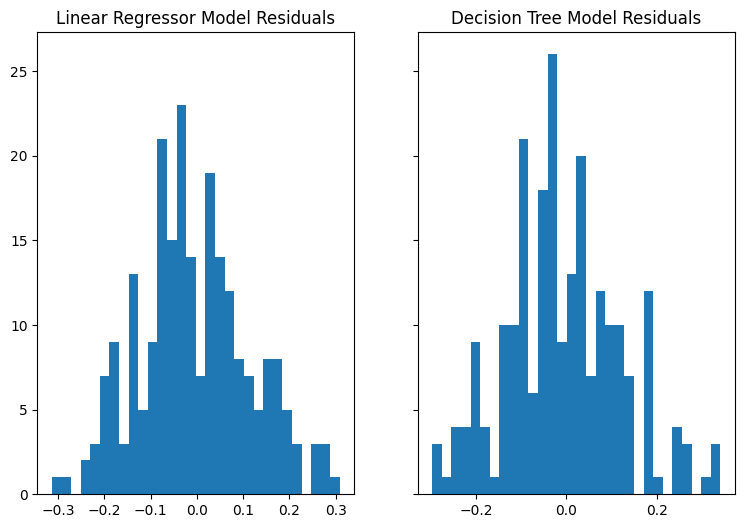

In [73]:
# Explore the residuals (differences between the predicted values and the true values). As presented in the histograms below the residuals are normally distributed with a mean of 0 for both models.

fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (9,6))
ax0.hist((y_test - y_pred), bins = 30)
ax0.set_title("Linear Regressor Model Residuals")
ax1.hist((y_test - dt_pred), bins = 30)
ax1.set_title("Decision Tree Model Residuals")

In [74]:
# For a better overview of the attendance rate for each fitnees class, only the test values have been filtered out from the data set and the predicted values of both models have been included as columns in the new processed_fitness dataset

processed_fitness = new_fitness.loc[y_test.index].assign(y_pred_lr = y_pred, y_pred_dt = dt_pred)

Text(0.5, 1.0, 'Decision Tree Regression Model')

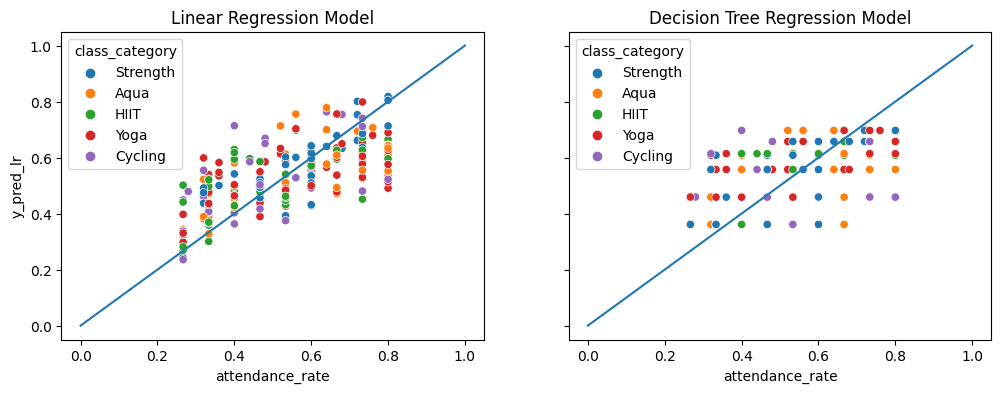

In [75]:
# Graphic representation of the attendance rate versus the predicted attendance rate for each fitness class: the line from 0 to 1 has been added to the graphs in order to make it easier to observe the trend in case the predicted values matched the expected values exactly. 

fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (12,4))
g = sns.scatterplot(x = 'attendance_rate', y = 'y_pred_lr', data = processed_fitness, hue = 'class_category', ax = ax0)
g.plot([0, 1])
g.set_title('Linear Regression Model')
f = sns.scatterplot(x = 'attendance_rate', y = 'y_pred_dt', data = processed_fitness, hue = 'class_category', ax = ax1)
f.plot([0, 1])
f.set_title('Decision Tree Regression Model')

## Model Evaluation

- Compute and print Root Mean Square Error score for linear regression. This score has been chosen because RMSE can be interpreted as the average error that the model's predictions have in comparison with the actual. A 0.12 score shows that the model has performed quite well, but more details regarding this score can be found in the graphic representations
- Compute and print the RMSE score for Decission Tree. For Decision Tree, the RMSE score has been chosen because it is easier to interpret and it's comparable with the same score for linear regression model. A score of 0.128 is almost as good as the score of the linear regression model.
- Create a scatterplot of the real test values versus the predicted values for both models. This will help to understand easier how the predicted values might differ from the true values
- Explore the residuals (differences between the predicted values and the true values). As presented in the histograms below the residuals are normally distributed with a mean of 0 for both models.
- For a better overview of the attendance rate for each fitnees class, only the test values have been filtered out from the data set and the predicted values of both models have been included as columns in the new processed_fitness dataset
- Graphic representation of the attendance rate versus the predicted attendance rate for each fitness class: the line from 0 to 1 has been added to the graphs in order to make it easier to observe the trend in case the predicted values matched the expected values exactly. 